# Datasets from train and test


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics  import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix ;

In [3]:
url = 'https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/3%20-%20Preprocessing/train_base.csv'

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/3%20-%20Preprocessing/train_base.csv')
df_train.head()

,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS,OBITO
0,0.563534,0.375589,0.398870,-1.182366,-0.571812,-0.004675,1.540279,1
1,0.350289,0.239055,0.398870,1.592348,-0.571812,0.491140,0.582164,0
2,0.352941,0.272060,0.259259,0.868510,-0.571812,0.491140,-0.735243,1
3,0.563534,0.326876,0.398870,-0.398208,-0.216773,-2.483752,-0.495715,0
4,0.350427,0.393389,0.259259,0.144671,-0.216773,0.491140,0.103107,1


In [5]:
x_train = df_train[['UF_LPI','MUN_LPI','SEXO','IDADE','MES_IS','ANO_IS','DIA_IS']]
y_train = df_train['OBITO']

In [6]:
url = 'https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/3%20-%20Preprocessing/test_base.csv'
df_test = pd.read_csv(url)
df_test.head()

,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS,OBITO
0,0.350289,0.326876,0.39887,0.989149,-0.216773,0.49114,-0.375950,0
1,0.350289,0.375589,0.39887,0.325631,-0.216773,0.49114,0.701928,0
2,0.352941,0.396635,0.39887,-0.518848,-0.571812,0.49114,1.180986,0
3,0.352941,0.343702,0.39887,0.446270,-0.216773,0.49114,-0.016657,1
4,0.352941,0.272060,0.39887,-0.337888,-0.571812,0.49114,-0.974772,0


In [7]:
x_test = df_test[['UF_LPI','MUN_LPI','SEXO','IDADE','MES_IS','ANO_IS','DIA_IS']]
y_test = df_test['OBITO']

In [8]:
# Select features

In [9]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

In [10]:
#select_k_best = SelectKBest(chi2, k = 5)

In [11]:
#select_k_best.fit_transform # Vai dar erro pq tem valores negativos

# Base line

In [12]:
from sklearn.dummy import DummyClassifier

In [13]:
dummy = DummyClassifier();

In [14]:
dummy_stratified = DummyClassifier(strategy= 'stratified', random_state= 1337)

In [15]:
dummy_stratified.fit(x_train,y_train)

DummyClassifier(random_state=1337, strategy='stratified')

In [16]:
dummy_predict = dummy_stratified.predict(x_test) # stratified

<Axes: >

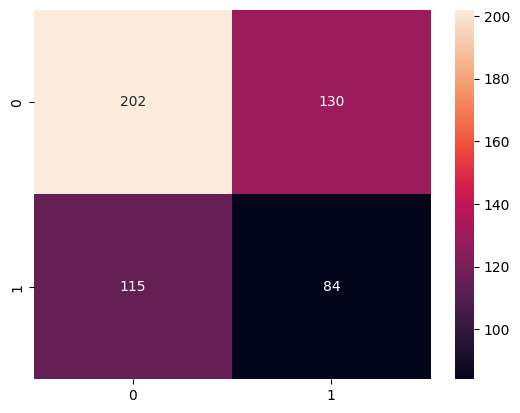

In [17]:
matriz = confusion_matrix(y_test ,dummy_predict)
sns.heatmap(matriz, annot = True, fmt = '.0f')

In [18]:
accuracy = accuracy_score(y_test, dummy_predict)
precision = precision_score(y_test, dummy_predict, zero_division=1)
recall = recall_score(y_test, dummy_predict)
f1 = f1_score(y_test, dummy_predict)

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Acurácia: 0.5386064030131826
Precisão: 0.3925233644859813
Recall: 0.4221105527638191
F1-score: 0.4067796610169491


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model_random = RandomForestClassifier(n_estimators= 200, random_state = 1337)

In [21]:
model_random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1337)

In [22]:
random_predict = model_random.predict(x_test)

In [23]:
model_random.feature_importances_

array([0.05666521, 0.36862241, 0.02148698, 0.24139107, 0.07539125,
       0.05061083, 0.18583225])

<Axes: >

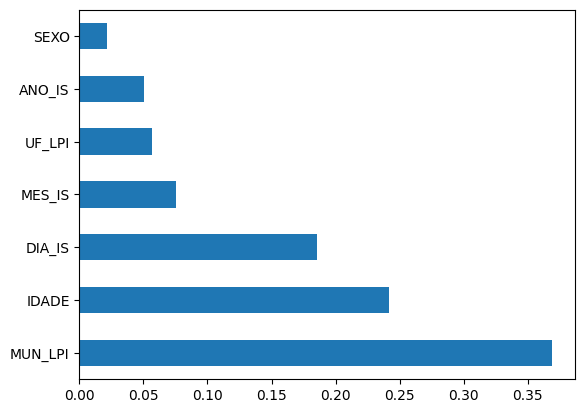

In [24]:
feat_importances = pd.Series(model_random.feature_importances_, index=x_train.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [25]:
accuracy = accuracy_score(y_test, random_predict)
precision = precision_score(y_test, random_predict)
recall = recall_score(y_test, random_predict)
f1 = f1_score(y_test, random_predict)

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Acurácia: 0.6497175141242938
Precisão: 0.5403726708074534
Recall: 0.4371859296482412
F1-score: 0.48333333333333334


<Axes: >

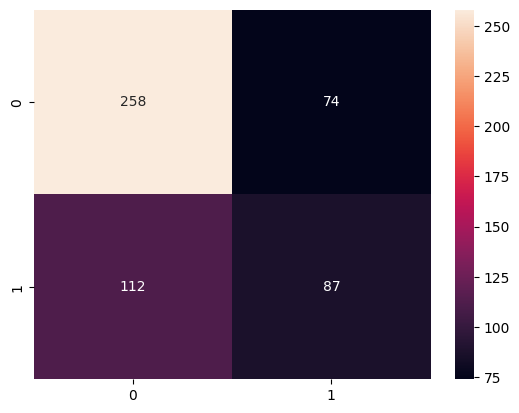

In [26]:
matriz = confusion_matrix(y_test, random_predict)
sns.heatmap(matriz, annot = True, fmt = '.0f')

# K-Nearest Neighbors (KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model_knn = KNeighborsClassifier(metric = 'euclidean')

In [29]:
# Validation Curve/ Curva de validação
from sklearn.model_selection import validation_curve

In [30]:
range = np.arange(1, 15) # 15 values

In [31]:
train_scores, test_scores = validation_curve(
    model_knn, x_train, y_train, param_name="n_neighbors", param_range=range,
    cv=5, scoring="f1", n_jobs=-1)

In [32]:
train_scores = np.mean(train_scores, axis=1) # mean/média
test_scores = np.mean(test_scores, axis=1)

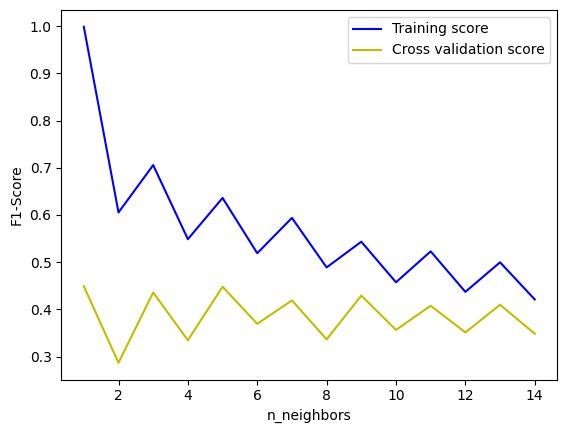

In [33]:
plt.plot(range, train_scores, label="Training score", color="b")
plt.plot(range, test_scores, label="Cross validation score", color="y")
plt.xlabel("n_neighbors")
plt.ylabel("F1-Score")
plt.legend(loc="best")
plt.show()

In [34]:
model_knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3)

In [35]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [36]:
knn_predict = model_knn.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test, knn_predict)
precision = precision_score(y_test, knn_predict)
recall = recall_score(y_test, knn_predict)
f1 = f1_score(y_test, knn_predict)

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Acurácia: 0.6045197740112994
Precisão: 0.4662576687116564
Recall: 0.38190954773869346
F1-score: 0.4198895027624309


# Select Features

In [38]:
# RFECV

In [39]:
from sklearn.feature_selection import RFECV

In [40]:
select_rfecv = RFECV(estimator = model_random,
                     cv = 4
                     ,step = 1,
                     scoring= 'f1');

In [41]:
select_rfecv.fit(x_train,y_train)

RFECV(cv=4,
      estimator=RandomForestClassifier(n_estimators=200, random_state=1337),
      scoring='f1')

In [42]:
x_train_rfecv = select_rfecv.transform(x_train)
x_test_rfecv = select_rfecv.transform(x_test)

In [43]:
select_rfecv.n_features_

5

In [44]:
x_train_rfecv.shape

(2121, 5)

In [45]:
x_test_rfecv.shape

(531, 5)

In [46]:
model_random.fit(x_train_rfecv, y_train)

RandomForestClassifier(n_estimators=200, random_state=1337)

In [47]:
random_rfecv_predict = model_random.predict(x_test_rfecv)

In [48]:
model_random.feature_importances_

array([0.06882765, 0.39664402, 0.25763623, 0.08307084, 0.19382126])

In [53]:
accuracy = accuracy_score(y_test, random_rfecv_predict)
precision = precision_score(y_test, random_rfecv_predict)
recall = recall_score(y_test, random_rfecv_predict)
f1 = f1_score(y_test, random_rfecv_predict)

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Acurácia: 0.6384180790960452
Precisão: 0.5222929936305732
Recall: 0.4120603015075377
F1-score: 0.4606741573033708
